<a href="https://colab.research.google.com/github/muddassirali8089/CustomerChurnPrediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("/customer_churn_dataset-training-master.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [7]:
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Dela

In [11]:
data.dropna(inplace=True)
data.drop('CustomerID', axis=1, inplace=True)
data.info()
print(data.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend         

In [9]:
print(data[data.isnull().any(axis=1)].index)


Index([199295], dtype='int64')


In [13]:
print(data['Churn'].value_counts())
print("Duplicates:", data.duplicated().sum())



Churn
1.0    249999
0.0    190833
Name: count, dtype: int64
Duplicates: 0


In [15]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Get all numeric columns (excluding categorical/object columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Skip the target column 'Churn' if you don't want to check outliers in it
numeric_columns.remove('Churn')

# Loop through and detect outliers in each numeric column
for col in numeric_columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in '{col}': {len(outliers)}")


Outliers in 'Age': 0
Outliers in 'Tenure': 0
Outliers in 'Usage Frequency': 0
Outliers in 'Support Calls': 0
Outliers in 'Payment Delay': 0
Outliers in 'Total Spend': 0
Outliers in 'Last Interaction': 0


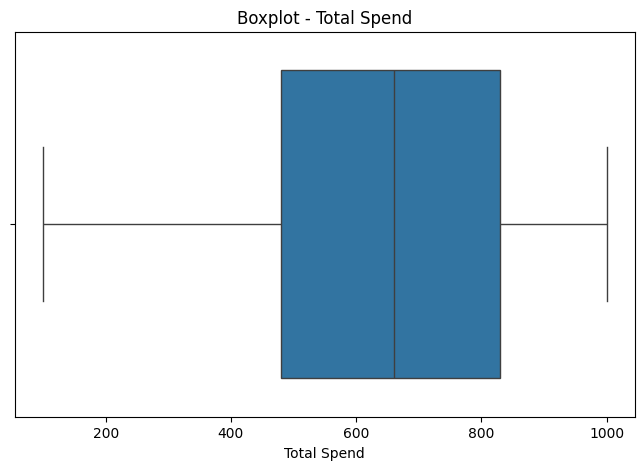

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Total Spend'])
plt.title("Boxplot - Total Spend")
plt.show()


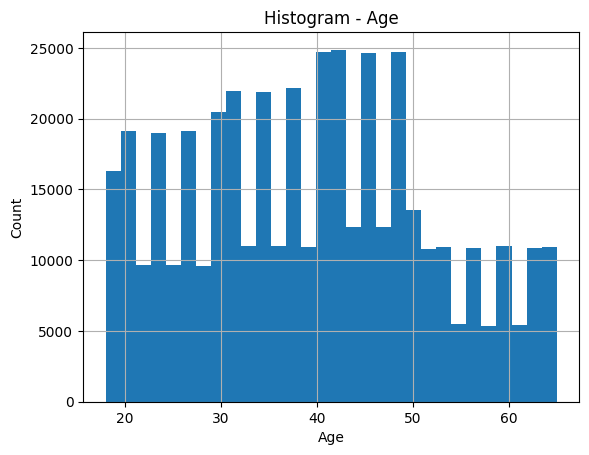

In [18]:
data['Age'].hist(bins=30)
plt.title("Histogram - Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


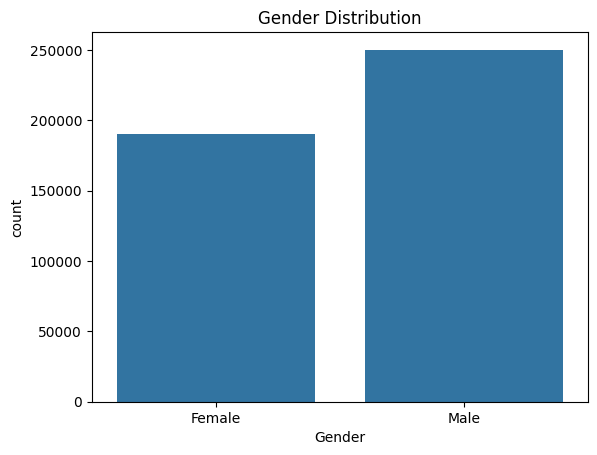

In [20]:
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()


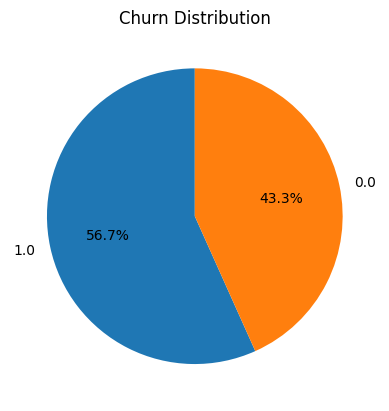

In [22]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()


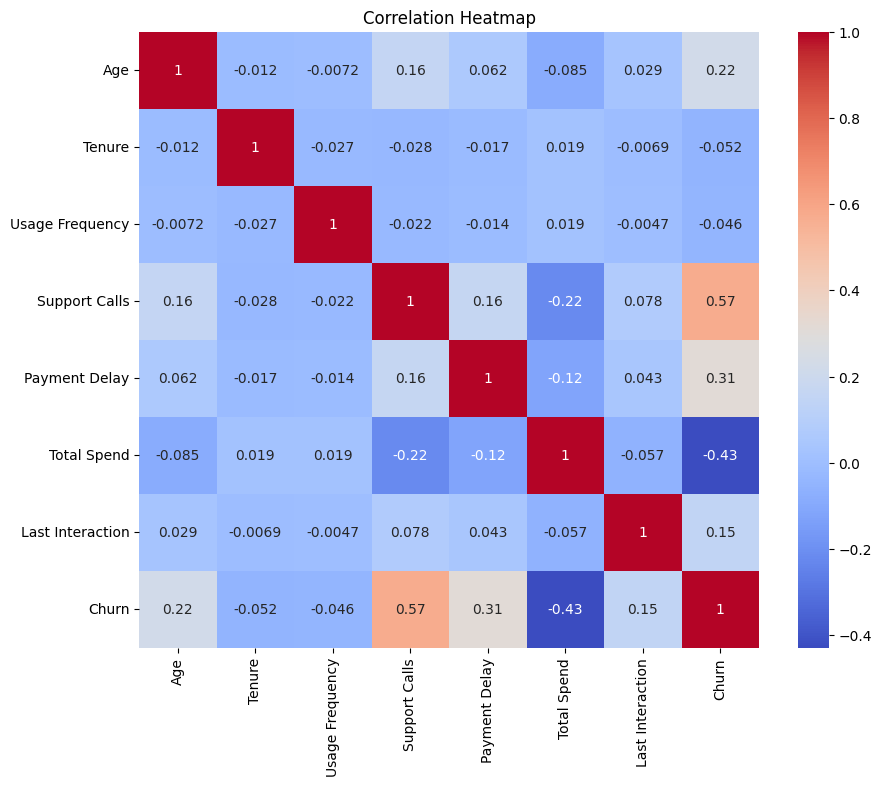

In [26]:
# Use only numeric columns for correlation
corr = data.select_dtypes(include=['number']).corr()

# Now plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



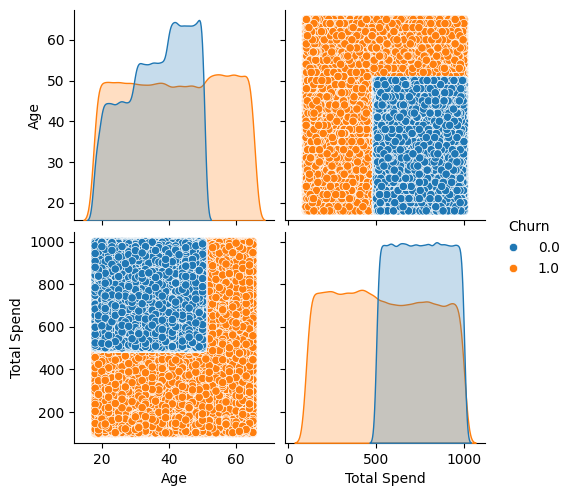

In [27]:
sns.pairplot(data[['Age', 'Total Spend', 'Churn']], hue='Churn')
plt.show()


In [29]:
print()
